In [2]:
!nvidia-smi


!pip -q install kaggle opencv-python matplotlib pandas pyyaml


!pip -q install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Mon Dec 15 19:40:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install kagglehub

In [4]:
import kagglehub


path = kagglehub.dataset_download("pkdarabi/cardetection")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cardetection' dataset.
Path to dataset files: /kaggle/input/cardetection


In [5]:
!ls -R "$path" | head -n 50

/kaggle/input/cardetection:
car
video.mp4

/kaggle/input/cardetection/car:
data.yaml
README.dataset.txt
README.roboflow.txt
test
train
valid

/kaggle/input/cardetection/car/test:
images
labels

/kaggle/input/cardetection/car/test/images:
00000_00000_00003_png.rf.d18afc3c9625ffb1974029d3e3762aee.jpg
00000_00000_00005_png.rf.ab60a274676963d378f5014e89d9e2b1.jpg
00000_00000_00006_png.rf.9d1ea68507aff6973a1dbcdc6f4422a8.jpg
00000_00000_00008_png.rf.ff305dcd6e9ceb9188937311a4a1b207.jpg
00000_00000_00013_png.rf.9076cbfc7f7811fa22547539a7e7ac02.jpg
00000_00000_00017_png.rf.6c2381a6a103a041f23159fbd44868ed.jpg
00000_00000_00021_png.rf.0803f8eb5b4566c44100cfef9d0bfa8e.jpg
00000_00000_00024_png.rf.8b21eb79678eed47df52a9ab4319bc08.jpg
00000_00001_00008_png.rf.936b0185c3b9131c96d42d60a5da1abb.jpg
00000_00001_00013_png.rf.c2367f9d1b377597b2cc3706b70fa818.jpg
00000_00001_00016_png.rf.2818a0160369aa9d2465007de479d6d3.jpg
00000_00001_00020_png.rf.4fc3ed0f124f480c5152a541fff2dbf7.jpg
00000_00001_00020_

In [6]:
!cp -r "$path" /content/traffic_dataset
!ls /content/traffic_dataset

car  video.mp4


In [7]:
!ls -la /content/traffic_dataset

total 3288
drwxr-xr-x 3 root root    4096 Dec 15 19:41 .
drwxr-xr-x 1 root root    4096 Dec 15 19:41 ..
drwxr-xr-x 5 root root    4096 Dec 15 19:42 car
-rw-r--r-- 1 root root 3350755 Dec 15 19:41 video.mp4


In [8]:
!find /content/traffic_dataset -maxdepth 3 -type d | sort

/content/traffic_dataset
/content/traffic_dataset/car
/content/traffic_dataset/car/test
/content/traffic_dataset/car/test/images
/content/traffic_dataset/car/test/labels
/content/traffic_dataset/car/train
/content/traffic_dataset/car/train/images
/content/traffic_dataset/car/train/labels
/content/traffic_dataset/car/valid
/content/traffic_dataset/car/valid/images
/content/traffic_dataset/car/valid/labels


In [9]:
import glob, os

base = "/content/traffic_dataset"

valid_dir = "valid" if os.path.exists(os.path.join(base, "valid")) else "val"

paths = {
    "train_images": os.path.join(base, "train", "images"),
    "train_labels": os.path.join(base, "train", "labels"),
    "valid_images": os.path.join(base, valid_dir, "images"),
    "valid_labels": os.path.join(base, valid_dir, "labels"),
    "test_images":  os.path.join(base, "test",  "images"),
    "test_labels":  os.path.join(base, "test",  "labels"),
}

for k,v in paths.items():
    print(k, "=>", v, "| exists:", os.path.exists(v))

for split in ["train","valid","test"]:
    img_key = f"{split}_images"
    lab_key = f"{split}_labels"
    img_count = len(glob.glob(paths[img_key] + "/*"))
    lab_count = len(glob.glob(paths[lab_key] + "/*"))
    print(f"{split}: images={img_count}, labels={lab_count}")

train_images => /content/traffic_dataset/train/images | exists: False
train_labels => /content/traffic_dataset/train/labels | exists: False
valid_images => /content/traffic_dataset/val/images | exists: False
valid_labels => /content/traffic_dataset/val/labels | exists: False
test_images => /content/traffic_dataset/test/images | exists: False
test_labels => /content/traffic_dataset/test/labels | exists: False
train: images=0, labels=0
valid: images=0, labels=0
test: images=0, labels=0


In [10]:
!find /content/traffic_dataset -maxdepth 3 -type d


/content/traffic_dataset
/content/traffic_dataset/car
/content/traffic_dataset/car/test
/content/traffic_dataset/car/test/images
/content/traffic_dataset/car/test/labels
/content/traffic_dataset/car/valid
/content/traffic_dataset/car/valid/images
/content/traffic_dataset/car/valid/labels
/content/traffic_dataset/car/train
/content/traffic_dataset/car/train/images
/content/traffic_dataset/car/train/labels


In [11]:
!find /content/traffic_dataset -type f | head -n 30


/content/traffic_dataset/video.mp4
/content/traffic_dataset/car/README.roboflow.txt
/content/traffic_dataset/car/README.dataset.txt
/content/traffic_dataset/car/test/images/00005_00056_00012_png.rf.1125a7436050023f0b75206acb088f2a.jpg
/content/traffic_dataset/car/test/images/000174_jpg.rf.4f68fb9dc24d6b51af78e847b1e30c10.jpg
/content/traffic_dataset/car/test/images/001031_jpg.rf.2b5fd42d6b8a7d445183a468803e57b9.jpg
/content/traffic_dataset/car/test/images/00002_00006_00028_png.rf.70f98b1fc1d0c548e37ffe7968c81a40.jpg
/content/traffic_dataset/car/test/images/001631_JPG_jpg.rf.18c57a703b3f30d8e2b21868d3657b5d.jpg
/content/traffic_dataset/car/test/images/FisheyeCamera_1_00509_png.rf.a4fdcf5053bc422a3b30b4cef69e5ea6.jpg
/content/traffic_dataset/car/test/images/road312_png.rf.ad2229fb2f7e136d7747b9568f121af4.jpg
/content/traffic_dataset/car/test/images/000684_jpg.rf.da8d58e5754b48f640c2521ce190912e.jpg
/content/traffic_dataset/car/test/images/001472_jpg.rf.38654b39e5bc13159c16952df2ba2dc0.jp

In [12]:
!find /content/traffic_dataset -type f -name "*.txt" | head -n 20


/content/traffic_dataset/car/README.roboflow.txt
/content/traffic_dataset/car/README.dataset.txt
/content/traffic_dataset/car/test/labels/001277_jpg.rf.03beffa81aa901c8462dfe1681a202f4.txt
/content/traffic_dataset/car/test/labels/00000_00005_00027_png.rf.397ea37e7f1f7c3029ef77da37b4d73a.txt
/content/traffic_dataset/car/test/labels/00000_00005_00003_png.rf.df858754a637fecb106924e9bc47a832.txt
/content/traffic_dataset/car/test/labels/001693_JPG_jpg.rf.9c74f3077d05257d04e7a58a48642fe0.txt
/content/traffic_dataset/car/test/labels/road431_png.rf.4cf451707a1af9d139094513881b7654.txt
/content/traffic_dataset/car/test/labels/000741_jpg.rf.48077831b42aa2a01691cd30be5da048.txt
/content/traffic_dataset/car/test/labels/00005_00014_00017_png.rf.ed92831e745be7167ec08c3f6d416b7d.txt
/content/traffic_dataset/car/test/labels/road322_png.rf.6028574359019d435c66689704d0418f.txt
/content/traffic_dataset/car/test/labels/00014_00004_00010_png.rf.d35020e5fb797eed8b025b0dca4fe434.txt
/content/traffic_dataset/

In [13]:
import glob, os

base = "/content/traffic_dataset/car"

paths = {
    "train_images": os.path.join(base, "train", "images"),
    "train_labels": os.path.join(base, "train", "labels"),
    "valid_images": os.path.join(base, "valid", "images"),
    "valid_labels": os.path.join(base, "valid", "labels"),
    "test_images":  os.path.join(base, "test",  "images"),
    "test_labels":  os.path.join(base, "test",  "labels"),
}

for k, v in paths.items():
    print(k, "exists:", os.path.exists(v))

print("\nCounts:")
for split in ["train", "valid", "test"]:
    img = len(glob.glob(paths[f"{split}_images"] + "/*"))
    lab = len(glob.glob(paths[f"{split}_labels"] + "/*"))
    print(f"{split}: images={img}, labels={lab}")


train_images exists: True
train_labels exists: True
valid_images exists: True
valid_labels exists: True
test_images exists: True
test_labels exists: True

Counts:
train: images=3530, labels=3530
valid: images=801, labels=801
test: images=638, labels=638


In [14]:
import os, yaml

DATA_ROOT = "/content/traffic_dataset/car"

data = {
    "train": os.path.join(DATA_ROOT, "train", "images"),
    "val":   os.path.join(DATA_ROOT, "valid", "images"),
    "test":  os.path.join(DATA_ROOT, "test",  "images"),
    "nc": 15,
    "names": [
        "Green Light",
        "Red Light",
        "Speed Limit 10",
        "Speed Limit 100",
        "Speed Limit 110",
        "Speed Limit 120",
        "Speed Limit 20",
        "Speed Limit 30",
        "Speed Limit 40",
        "Speed Limit 50",
        "Speed Limit 60",
        "Speed Limit 70",
        "Speed Limit 80",
        "Speed Limit 90",
        "Stop"
    ]
}

yaml_path = "/content/traffic_yolov7.yaml"
with open(yaml_path, "w") as f:
    yaml.safe_dump(data, f, sort_keys=False)

print(" Wrote:", yaml_path)
print(data)


 Wrote: /content/traffic_yolov7.yaml
{'train': '/content/traffic_dataset/car/train/images', 'val': '/content/traffic_dataset/car/valid/images', 'test': '/content/traffic_dataset/car/test/images', 'nc': 15, 'names': ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']}


In [15]:
import os, yaml

yaml_path = "/content/traffic_yolov7.yaml"
with open(yaml_path, "r") as f:
    y = yaml.safe_load(f)

print("Loaded YAML:", y)

for k in ["train", "val", "test"]:
    p = y[k]
    print(k, "=>", p, "| exists:", os.path.exists(p))


Loaded YAML: {'train': '/content/traffic_dataset/car/train/images', 'val': '/content/traffic_dataset/car/valid/images', 'test': '/content/traffic_dataset/car/test/images', 'nc': 15, 'names': ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']}
train => /content/traffic_dataset/car/train/images | exists: True
val => /content/traffic_dataset/car/valid/images | exists: True
test => /content/traffic_dataset/car/test/images | exists: True


In [16]:
import glob, os, random

train_images = "/content/traffic_dataset/car/train/images"
train_labels = "/content/traffic_dataset/car/train/labels"

img = random.choice(glob.glob(train_images + "/*"))
base = os.path.splitext(os.path.basename(img))[0]
label = os.path.join(train_labels, base + ".txt")

print("Image:", img)
print("Label:", label)
print("Label exists?", os.path.exists(label))

if os.path.exists(label):
    with open(label, "r") as f:
        print("\nFirst 5 label lines:")
        for i, line in enumerate(f.readlines()[:5]):
            print(line.strip())


Image: /content/traffic_dataset/car/train/images/FisheyeCamera_1_00926_png.rf.511cfac04ff48a1fe99b560b4a4fb9e2.jpg
Label: /content/traffic_dataset/car/train/labels/FisheyeCamera_1_00926_png.rf.511cfac04ff48a1fe99b560b4a4fb9e2.txt
Label exists? True

First 5 label lines:


In [17]:
!nvidia-smi


Mon Dec 15 19:51:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [18]:
!git clone https://github.com/WongKinYiu/yolov7

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.29 MiB | 15.96 MiB/s, done.
Resolving deltas: 100% (511/511), done.


In [19]:
%cd yolov7

/content/yolov7


In [20]:
!ls


cfg	detect.py  hubconf.py  models	  requirements.txt  tools	  utils
data	export.py  inference   paper	  scripts	    train_aux.py
deploy	figure	   LICENSE.md  README.md  test.py	    train.py


In [21]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 25.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [22]:
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

--2025-12-15 19:53:15--  https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/511187726/b0243edf-9fb0-4337-95e1-42555f1b37cf?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-15T20%3A47%3A29Z&rscd=attachment%3B+filename%3Dyolov7.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-15T19%3A47%3A05Z&ske=2025-12-15T20%3A47%3A29Z&sks=b&skv=2018-11-09&sig=G%2F4Yz06FC6fUsmjhdR1HuXCQ3dz0zk1lY7EE%2FE%2FVN60%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2NTgzMDE5NSwibmJmIjoxNzY1ODI4Mzk1LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLmNv

In [23]:
!ls yolov7.pt

yolov7.pt


In [24]:
!python train.py \
  --img 640 640 \
  --batch 16 \
  --epochs 50 \
  --data /content/traffic_yolov7.yaml \
  --cfg cfg/training/yolov7.yaml \
  --weights yolov7.pt \
  --name traffic_signs_yolov7 \
  --device 0

2025-12-15 19:53:49.299996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765828429.320721    4522 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765828429.326642    4522 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765828429.341407    4522 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765828429.341431    4522 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765828429.341435    4522 computation_placer.cc:177] computation placer alr

In [26]:
!ls runs/train/traffic_signs_yolov7/weights

In [27]:
!sed -n '60,90p' /content/yolov7/train.py

    plots = not opt.evolve  # create plots
    cuda = device.type != 'cpu'
    init_seeds(2 + rank)
    with open(opt.data) as f:
        data_dict = yaml.load(f, Loader=yaml.SafeLoader)  # data dict
    is_coco = opt.data.endswith('coco.yaml')

    # Logging- Doing this before checking the dataset. Might update data_dict
    loggers = {'wandb': None}  # loggers dict
    if rank in [-1, 0]:
        opt.hyp = hyp  # add hyperparameters
        run_id = torch.load(weights, map_location=device).get('wandb_id') if weights.endswith('.pt') and os.path.isfile(weights) else None
        wandb_logger = WandbLogger(opt, Path(opt.save_dir).stem, run_id, data_dict)
        loggers['wandb'] = wandb_logger.wandb
        data_dict = wandb_logger.data_dict
        if wandb_logger.wandb:
            weights, epochs, hyp = opt.weights, opt.epochs, opt.hyp  # WandbLogger might update weights, epochs if resuming

    nc = 1 if opt.single_cls else int(data_dict['nc'])  # number of classes
    names = ['ite

In [28]:
import re, pathlib

p = pathlib.Path("/content/yolov7/train.py")
text = p.read_text()

# Replace torch.load(weights, map_location=device) if present
text_new = re.sub(
    r"torch\.load\(([^)]*?),\s*map_location=([^)]+)\)",
    r"torch.load(\1, map_location=\2, weights_only=False)",
    text
)

# If it was torch.load(weights, map_location=device) without named args
text_new = text_new.replace(
    "torch.load(weights, map_location=device)",
    "torch.load(weights, map_location=device, weights_only=False)"
)

if text_new == text:
    print("No change made in train.py (pattern not found). We will patch the loader in models/experimental.py next.")
else:
    p.write_text(text_new)
    print("Patched train.py for PyTorch 2.6+")


Patched train.py for PyTorch 2.6+


In [30]:
import pathlib

p = pathlib.Path("/content/yolov7/models/experimental.py")
text = p.read_text()

# typical line: ckpt = torch.load(w, map_location=map_location)  OR torch.load(w, map_location=device)
text_new = text.replace(
    "torch.load(w, map_location=map_location)",
    "torch.load(w, map_location=map_location, weights_only=False)"
).replace(
    "torch.load(w, map_location=device)",
    "torch.load(w, map_location=device, weights_only=False)"
)

if text_new == text:
    print("No change made in experimental.py (pattern not found). Let's locate torch.load lines.")
else:
    p.write_text(text_new)
    print("Patched experimental.py for PyTorch 2.6+")


No change made in experimental.py (pattern not found). Let's locate torch.load lines.


In [31]:
!grep -n "torch.load" -n /content/yolov7/models/experimental.py | head -n 20


252:        ckpt = torch.load(w, map_location=map_location, weights_only=False)  # load


In [32]:
%cd /content/yolov7

!python train.py \
  --img 640 640 \
  --batch 16 \
  --epochs 50 \
  --data /content/traffic_yolov7.yaml \
  --cfg cfg/training/yolov7.yaml \
  --weights yolov7.pt \
  --name traffic_signs_yolov7 \
  --device 0

/content/yolov7
2025-12-15 19:58:42.919150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765828722.938888    5789 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765828722.944731    5789 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765828722.959463    5789 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765828722.959492    5789 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765828722.959495    5789 computation_placer.cc:177] comput

In [33]:
%cd /content/yolov7
!ls -la runs/train/traffic_signs_yolov72/weights

/content/yolov7
total 2774628
drwxr-xr-x 2 root root      4096 Dec 15 22:55 .
drwxr-xr-x 3 root root      4096 Dec 15 22:55 ..
-rw-r--r-- 1 root root 299008945 Dec 15 22:55 best.pt
-rw-r--r-- 1 root root 299086520 Dec 15 20:04 epoch_000.pt
-rw-r--r-- 1 root root 299090104 Dec 15 21:29 epoch_024.pt
-rw-r--r-- 1 root root 299093304 Dec 15 22:41 epoch_045.pt
-rw-r--r-- 1 root root 299093432 Dec 15 22:44 epoch_046.pt
-rw-r--r-- 1 root root 299093560 Dec 15 22:48 epoch_047.pt
-rw-r--r-- 1 root root 299093752 Dec 15 22:51 epoch_048.pt
-rw-r--r-- 1 root root 299093880 Dec 15 22:55 epoch_049.pt
-rw-r--r-- 1 root root 149531856 Dec 15 19:59 init.pt
-rw-r--r-- 1 root root 299008945 Dec 15 22:55 last.pt


In [34]:
import pathlib

p = pathlib.Path("/content/yolov7/utils/general.py")
t = p.read_text()


t2 = t.replace(
    "torch.load(f, map_location=torch.device('cpu'))",
    "torch.load(f, map_location=torch.device('cpu'), weights_only=False)"
).replace(
    "torch.load(f, map_location=torch.device(\"cpu\"))",
    "torch.load(f, map_location=torch.device(\"cpu\"), weights_only=False)"
)

if t2 == t:
    print("No direct match found — we'll locate the torch.load line next.")
else:
    p.write_text(t2)
    print("Patched utils/general.py strip_optimizer for PyTorch 2.6+")


Patched utils/general.py strip_optimizer for PyTorch 2.6+


In [35]:

!python -c "from utils.general import strip_optimizer; strip_optimizer('runs/train/traffic_signs_yolov72/weights/best.pt')"


Optimizer stripped from runs/train/traffic_signs_yolov72/weights/best.pt, 75.0MB


In [36]:
%cd /content/yolov7
!python test.py \
  --weights runs/train/traffic_signs_yolov72/weights/best.pt \
  --data /content/traffic_yolov7.yaml \
  --task val \
  --img 640

/content/yolov7
Namespace(weights=['runs/train/traffic_signs_yolov72/weights/best.pt'], data='/content/traffic_yolov7.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.9.0+cu126 CUDA:0 (Tesla T4, 15095.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36557288 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  retu

In [37]:
!python detect.py \
  --weights runs/train/traffic_signs_yolov72/weights/best.pt \
  --conf 0.25 \
  --img-size 640 \
  --source /content/traffic_dataset/car/test/images \
  --name traffic_signs_yolov7_infer


Namespace(weights=['runs/train/traffic_signs_yolov72/weights/best.pt'], source='/content/traffic_dataset/car/test/images', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='traffic_signs_yolov7_infer', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.9.0+cu126 CUDA:0 (Tesla T4, 15095.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36557288 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgr

In [38]:
!ls -la runs/detect/traffic_signs_yolov7_infer | head -n 30

total 26812
drwxr-xr-x 2 root root  69632 Dec 15 23:00 .
drwxr-xr-x 3 root root   4096 Dec 15 23:00 ..
-rw-r--r-- 1 root root  35162 Dec 15 23:00 00000_00000_00003_png.rf.d18afc3c9625ffb1974029d3e3762aee.jpg
-rw-r--r-- 1 root root  35612 Dec 15 23:00 00000_00000_00005_png.rf.ab60a274676963d378f5014e89d9e2b1.jpg
-rw-r--r-- 1 root root  37892 Dec 15 23:00 00000_00000_00006_png.rf.9d1ea68507aff6973a1dbcdc6f4422a8.jpg
-rw-r--r-- 1 root root  38758 Dec 15 23:00 00000_00000_00008_png.rf.ff305dcd6e9ceb9188937311a4a1b207.jpg
-rw-r--r-- 1 root root  36164 Dec 15 23:00 00000_00000_00013_png.rf.9076cbfc7f7811fa22547539a7e7ac02.jpg
-rw-r--r-- 1 root root  42317 Dec 15 23:00 00000_00000_00017_png.rf.6c2381a6a103a041f23159fbd44868ed.jpg
-rw-r--r-- 1 root root  45517 Dec 15 23:00 00000_00000_00021_png.rf.0803f8eb5b4566c44100cfef9d0bfa8e.jpg
-rw-r--r-- 1 root root  43402 Dec 15 23:00 00000_00000_00024_png.rf.8b21eb79678eed47df52a9ab4319bc08.jpg
-rw-r--r-- 1 root root  40515 Dec 15 23:00 00000_00001_00

In [39]:
!ls -la runs/train/traffic_signs_yolov72 | grep -E "results|png|txt"

-rw-r--r-- 1 root root 279143 Dec 15 22:55 confusion_matrix.png
-rw-r--r-- 1 root root 454145 Dec 15 22:55 F1_curve.png
-rw-r--r-- 1 root root 336010 Dec 15 22:55 P_curve.png
-rw-r--r-- 1 root root 244796 Dec 15 22:55 PR_curve.png
-rw-r--r-- 1 root root 363462 Dec 15 22:55 R_curve.png
-rw-r--r-- 1 root root 226640 Dec 15 22:55 results.png
-rw-r--r-- 1 root root   7550 Dec 15 22:55 results.txt


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

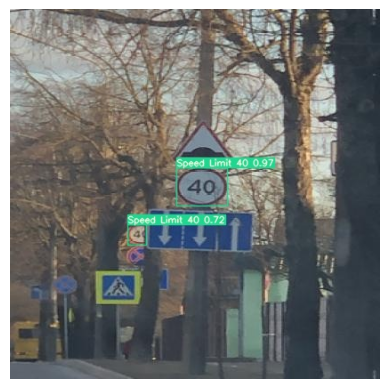

In [42]:
from PIL import Image
import matplotlib.pyplot as plt
import random, glob

imgs = glob.glob("runs/detect/traffic_signs_yolov7_infer/*.jpg")
img = random.choice(imgs)

im = Image.open(img)
plt.imshow(im)
plt.axis("off")


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

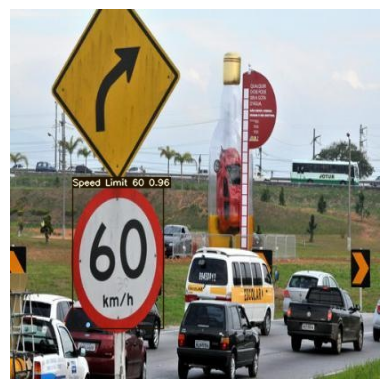

In [43]:
from PIL import Image
import matplotlib.pyplot as plt
import random, glob

imgs = glob.glob("runs/detect/traffic_signs_yolov7_infer/*.jpg")
img = random.choice(imgs)

im = Image.open(img)
plt.imshow(im)
plt.axis("off")


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

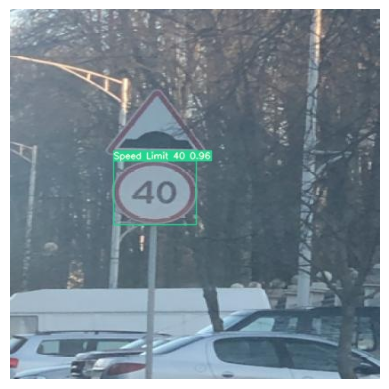

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
import random, glob

imgs = glob.glob("runs/detect/traffic_signs_yolov7_infer/*.jpg")
img = random.choice(imgs)

im = Image.open(img)
plt.imshow(im)
plt.axis("off")


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

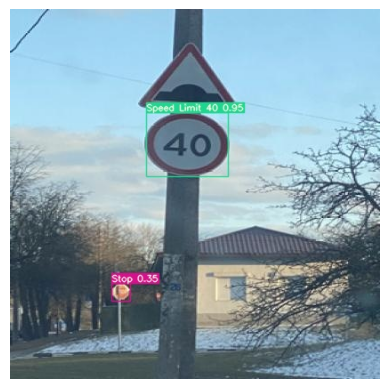

In [45]:
from PIL import Image
import matplotlib.pyplot as plt
import random, glob

imgs = glob.glob("runs/detect/traffic_signs_yolov7_infer/*.jpg")
img = random.choice(imgs)

im = Image.open(img)
plt.imshow(im)
plt.axis("off")


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

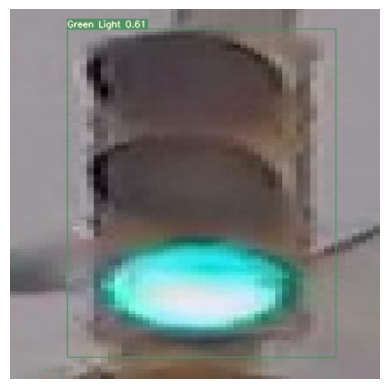

In [57]:
from PIL import Image
import matplotlib.pyplot as plt
import random, glob

imgs = glob.glob("runs/detect/traffic_signs_yolov7_infer/*.jpg")
img = random.choice(imgs)

im = Image.open(img)
plt.imshow(im)
plt.axis("off")


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

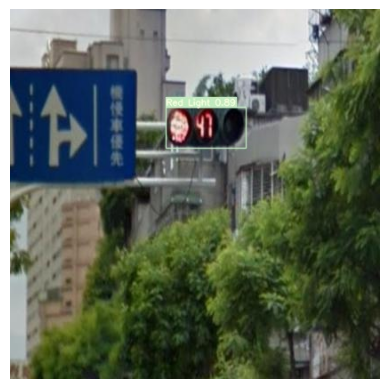

In [50]:
from PIL import Image
import matplotlib.pyplot as plt
import random, glob

imgs = glob.glob("runs/detect/traffic_signs_yolov7_infer/*.jpg")
img = random.choice(imgs)

im = Image.open(img)
plt.imshow(im)
plt.axis("off")


In [58]:
%cd /content/yolov7

!python test.py \
  --weights runs/train/traffic_signs_yolov72/weights/best.pt \
  --data /content/traffic_yolov7.yaml \
  --task val \
  --img 640


/content/yolov7
Namespace(weights=['runs/train/traffic_signs_yolov72/weights/best.pt'], data='/content/traffic_yolov7.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.9.0+cu126 CUDA:0 (Tesla T4, 15095.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36557288 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  retu

In [59]:
!python test.py \
  --weights runs/train/traffic_signs_yolov72/weights/best.pt \
  --data /content/traffic_yolov7.yaml \
  --task test \
  --img 640


Namespace(weights=['runs/train/traffic_signs_yolov72/weights/best.pt'], data='/content/traffic_yolov7.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.9.0+cu126 CUDA:0 (Tesla T4, 15095.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36557288 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid

In [60]:
!zip -r yolov7_traffic_signs_submission.zip \
  runs/train/traffic_signs_yolov72 \
  runs/detect/traffic_signs_yolov7_infer \
  /content/traffic_yolov7.yaml


  adding: runs/train/traffic_signs_yolov72/ (stored 0%)
  adding: runs/train/traffic_signs_yolov72/train_batch5.jpg (deflated 5%)
  adding: runs/train/traffic_signs_yolov72/train_batch8.jpg (deflated 5%)
  adding: runs/train/traffic_signs_yolov72/results.png (deflated 12%)
  adding: runs/train/traffic_signs_yolov72/confusion_matrix.png (deflated 18%)
  adding: runs/train/traffic_signs_yolov72/train_batch4.jpg (deflated 3%)
  adding: runs/train/traffic_signs_yolov72/train_batch2.jpg (deflated 7%)
  adding: runs/train/traffic_signs_yolov72/test_batch0_pred.jpg (deflated 3%)
  adding: runs/train/traffic_signs_yolov72/R_curve.png (deflated 6%)
  adding: runs/train/traffic_signs_yolov72/test_batch0_labels.jpg (deflated 3%)
  adding: runs/train/traffic_signs_yolov72/events.out.tfevents.1765828731.0ef8d0e7c08c.5789.0 (deflated 66%)
  adding: runs/train/traffic_signs_yolov72/test_batch2_labels.jpg (deflated 5%)
  adding: runs/train/traffic_signs_yolov72/weights/ (stored 0%)
  adding: runs/trai